In [1]:
## Path for modules

import cartopy

import xarray as xr
import sys

import numpy as np
sys.path.insert(0,"/home/alberta/notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sys.path.insert(0,"/home/alberta/notebooks/git/stage-Erika")
import Wavenum_freq_spec_func as wfs


In [2]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=20,dashboard_address=':8686')
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:38019 Dashboard: http://127.0.0.1:8686/status,Cluster Workers: 20 Cores: 20 Memory: 201.19 GB


## Dataset
### Format netcdf

In [3]:
data_dirT0 = '/bettik/alberta/eNATL60ACO-BLBT02-UV10m/'


In [4]:
ufileT0=data_dirT0+'eNATL60ACO-BLBT02_y2009m*.1h_vozocrtx10m.nc' # JAS
vfileT0=data_dirT0+'eNATL60ACO-BLBT02_y2009m*.1h_vomecrty10m.nc' # JAS


In [5]:
dsuT0=xr.open_mfdataset(ufileT0,combine='by_coords',parallel=True,chunks={'x':200,'y':200})
dsvT0=xr.open_mfdataset(vfileT0,combine='by_coords',parallel=True,chunks={'x':200,'y':200})


In [6]:
uT0=dsuT0.vozocrtx
vT0=dsvT0.vomecrty 


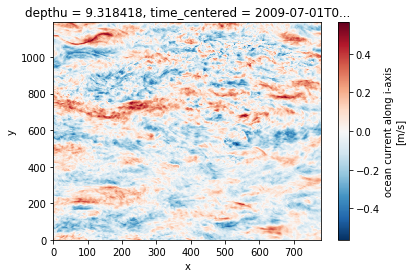

In [7]:
uT0[0].plot()

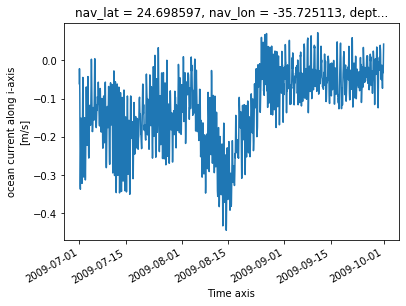

In [8]:
uT0[:,0,100,100].plot()

CPU times: user 1min 28s, sys: 7.53 s, total: 1min 35s
Wall time: 4min 58s


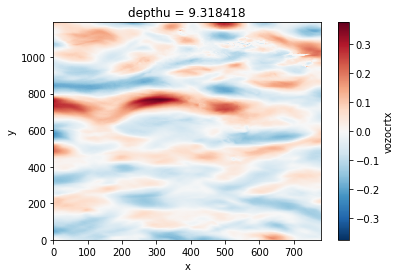

In [9]:
%time uT0.mean(dim='time_counter').plot()

CPU times: user 41.9 s, sys: 5.76 s, total: 47.7 s
Wall time: 3min 52s


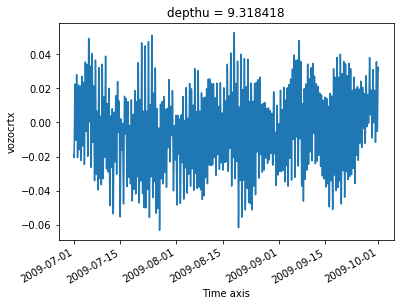

In [10]:
%time uT0.mean(dim='x').mean(dim='y').plot()

In [11]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
